In [ ]:
#Dataset description
'''Our time series observations that will be used in this example are the 
number of acres burned in forest fires in Canada over a period of 70 years.
We can see below how our time series looks like:'''

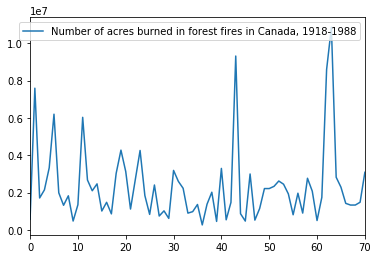

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_dataset = pd.read_csv("number_of_acres_burned_in_forest.csv")
csv_dataset.plot()
plt.show()

In [3]:
optimal_alpha = None
best_mse = None
db = csv_dataset.iloc[:, :].values.astype('float32')
mean_results_for_all_possible_alpha_values = np.zeros(9)
for alpha in range(0, 9):
    pt = np.mean(db[:, 0][0:5])
    mean_for_alpha = np.zeros(len(db))
    mean_for_alpha[0] = np.power(db[0][0] - pt, 2)
    for i in range(1, len(db)):
        pt = pt + ((alpha + 1) * 0.1) * (db[i - 1][0] - pt)
        mean_for_alpha[i] = np.power(db[i][0] - pt, 2)
    mean_results_for_all_possible_alpha_values[alpha] = np.mean(mean_for_alpha)
optimal_alpha = (np.argmin(mean_results_for_all_possible_alpha_values) + 1) * 0.1
best_mse = np.min(mean_results_for_all_possible_alpha_values)
print("Best MSE = %s" % best_mse)
print("Optimal alpha = %s" % optimal_alpha)

Best MSE = 4417861521188.411
Optimal alpha = 0.1


In [ ]:
'''After the optimal ,,alpha'' has been found,
we can forecast the t+1 observation as following:'''

In [4]:
pt = np.mean(db[:, 0][0:5])
for i in range(1, len(db) + 1):
    pt = pt + optimal_alpha * (db[i - 1][0] - pt)
print("Next observation = %s" % pt)

Next observation = 2610828.585561429


In [ ]:
#Forecast evaluation
'''In this section we will compare the forecast data with the real data
for the optimal ,,alpha''.'''

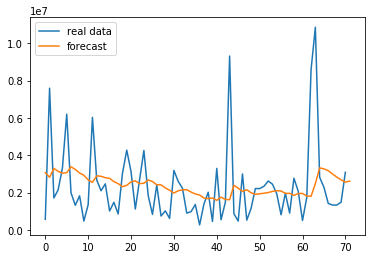

In [5]:
forecast = np.zeros(len(db) + 1)
pt = np.mean(db[:, 0][0:5])
forecast[0] = pt
for i in range(1, len(db) + 1):
    pt = pt + optimal_alpha * (db[i - 1][0] - pt)
    forecast[i] = pt
plt.plot(db[:, 0],label = 'real data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.show()